# ___GRIP - DATA SCIENCE AND BUSINESS ANALYTICS___

## ___Author Name = Naveen Kumar___

### ___Date = December,  19 2022___

# ___Task-3: Exploratory Data Analysis- Retail___


### ___Import Liabraries___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### ___Read the Data File___

In [2]:
df = pd.read_csv(r"C:\Users\navee\Downloads\SampleSuperstore.csv")

### ___Descriptive Analysis___

#### Basic Descriptions of the Data and Features

In [3]:
df.shape

(9994, 13)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


> ___Info about Data : The Retail Dataset having 9994 records and 13 features.___

In [7]:
# Statistical analysis of dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Correlation 
df.corr() 

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
# Count of Unique Values in each Attribute
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Handle Missing  & Duplicate Values

In [11]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

> __In the Retail dataset, no missing values exist, so there is no need to handle them.__

In [12]:
df.duplicated().sum() #  There are 17 duplicated Entires in the dateset 

17

In [13]:
# View of Duplicated Rows
duplicateRows = df[df.duplicated()]
duplicateRows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [14]:
df = df.drop_duplicates() # Drop all the duplicated values in the dataset

In [15]:
df.duplicated().sum()

0

In [16]:
df = df.reset_index()

In [17]:
df.head()

,index,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
df.drop("index",axis=1,inplace=True)

### Data Selection
> __Analyze the weak areas and find out what can be done to increase profit__

### Target Class =  Profit  

#### Lets check the Catagorical and Numerical column data in our dataset

In [19]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O'] #catagorical data
num_col=[fea for fea in df.columns if df[fea].dtype != 'O'] #numarical data

In [20]:
# Categorical Column
df[cat_col].head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [21]:
# Numerical Column
df[num_col].head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


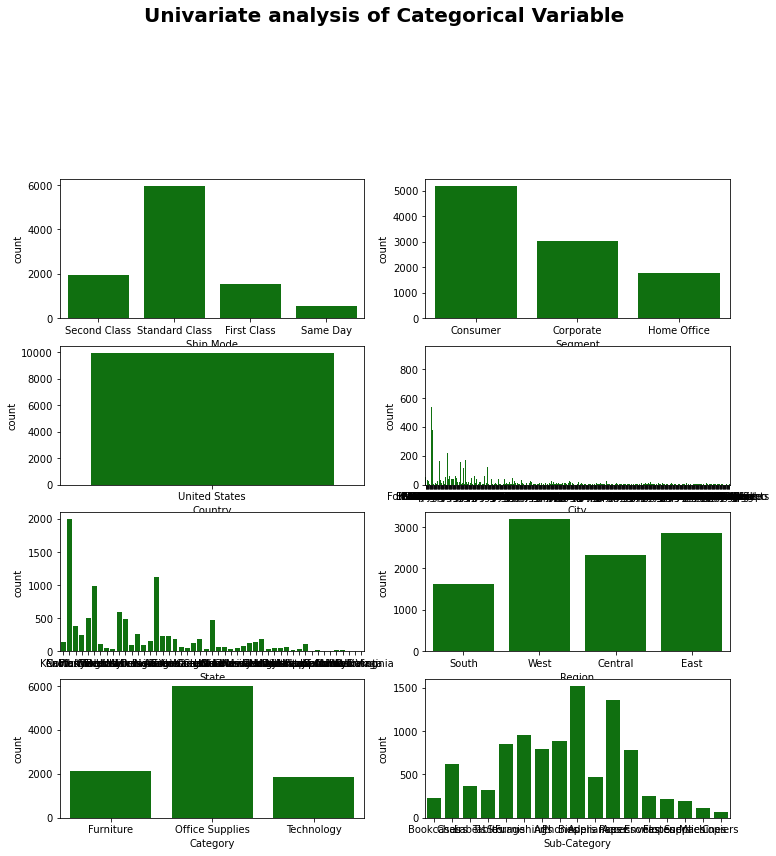

In [22]:
#Univariate Analysis on Categorical feature
plt.figure(figsize=(12,24))
plt.suptitle('Univariate analysis of Categorical Variable', fontsize=20, fontweight='bold')
for i in range (0, len(cat_col)):
             plt.subplot(8,2,i+1)
             sns.countplot(df[cat_col[i]], color='g')
             plt.xlabel(cat_col[i])

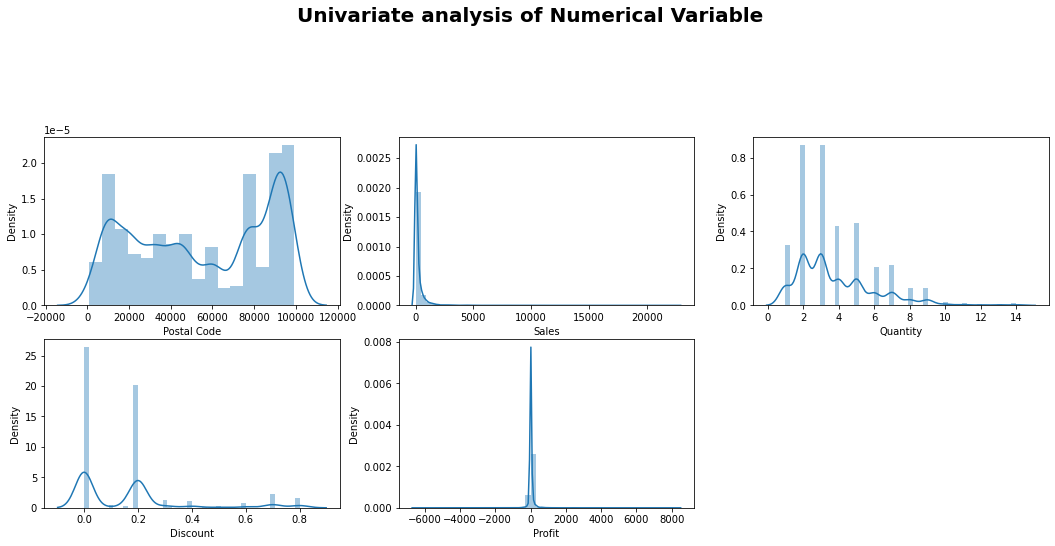

In [23]:
#Univariate Analysis on Numerical feature
plt.figure(figsize=(18,18))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')
for i in range (0, len(num_col)):
             plt.subplot(5,3,i+1)
             sns.distplot(df[num_col[i]])
             plt.xlabel(num_col[i])
plt.show()

> ___Conclusion :___
- __Pofit Shape is Symetric Hence, data is normally distributed__
- __Sales Shape is Right Skewed__

# Multivariate analysis

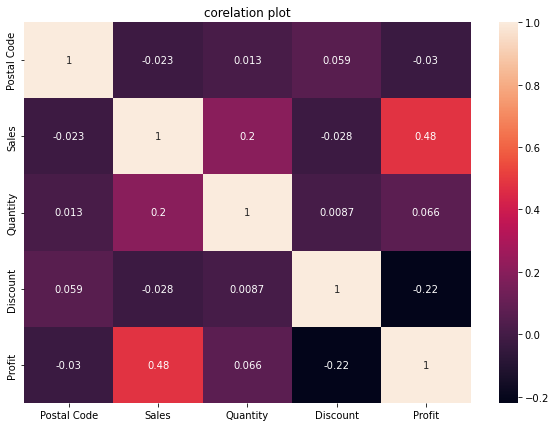

In [24]:
# Plot Shows the Correlation between each numerical variable
plt.figure(figsize=(10,7))
plt.title('corelation plot')
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

> ___Heat Map Shows there is Strong Positive Correlation B/w Sales and Profit  (0.48).___

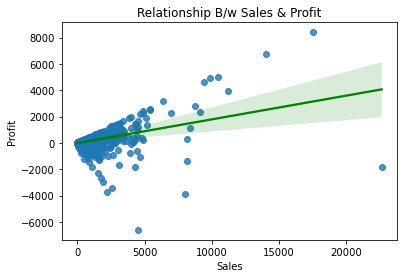

In [25]:
sns.regplot(data=df, x='Sales', y='Profit',line_kws={'color': 'g'})
# plt.xlim(0)
# plt.ylim(0)
plt.title("Relationship B/w Sales & Profit")
plt.show()

> ___There is linear Relationship B/w Sales and Profit.___

### ___Profit & Sales Data Analysis___

<AxesSubplot:title={'center':'Relation b/w Profit and Category'}, xlabel='Profit', ylabel='Category'>

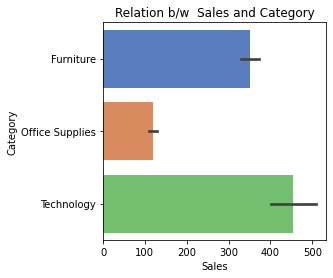

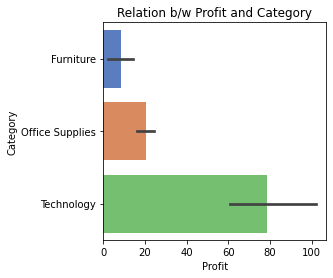

In [26]:
plt.figure(figsize=(4,4))
plt.title('Relation b/w  Sales and Category')
sns.barplot(data= df, x= 'Sales', y = 'Category', palette = "muted")

plt.figure(figsize=(4,4))
plt.title('Relation b/w Profit and Category')
sns.barplot(data= df, x= 'Profit', y = 'Category', palette = "muted")

> ___Sales of Technology Category is greater than other Categories, but Profit of Technology is all time high than other categries.___\
> ___Recommendation: Profit of other Categories need to be improve___

<AxesSubplot:title={'center':'Relation B/w Sub-Category and Profit'}, xlabel='Profit', ylabel='Sub-Category'>

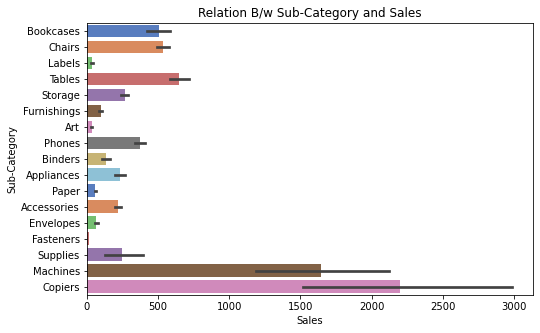

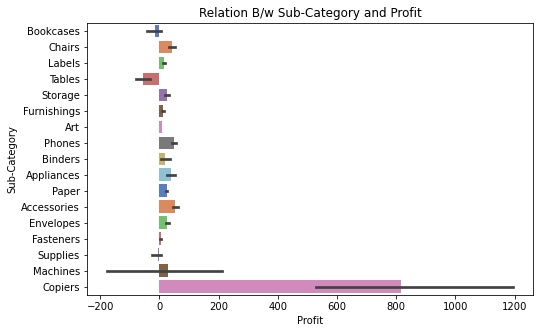

In [27]:
plt.figure(figsize=(8,5))
plt.title('Relation B/w Sub-Category and Sales')
sns.barplot(data= df, y = 'Sub-Category', x= 'Sales', palette = "muted")

plt.figure(figsize=(8,5))
plt.title('Relation B/w Sub-Category and Profit')
sns.barplot(data= df, y = 'Sub-Category', x= 'Profit', palette = "muted")



> ___Sales of Copier and Machines Sub-Category is greater than others, but Profit of Machine Sub-Category is too low and Profit of Copier Category is performing well.___\
> ___Recommendation: Profit of Tables Bookcases and Supplies Sub-Category need to be work on immediate basis because these two categories are in negative causing loss and also need to be improve the Sales of other Sub-Categories too.___

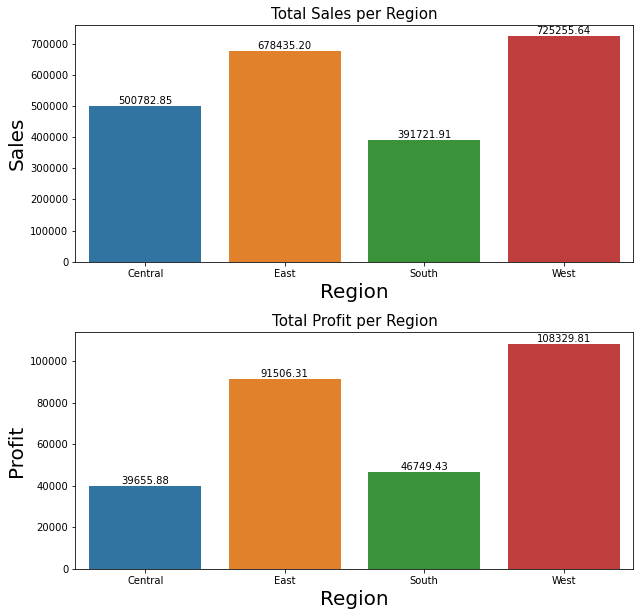

In [28]:
# data used in this section
temp_data = df.groupby(['Region']).sum().reset_index()

#
fig, axes = plt.subplots(2, 1, figsize = (10,10))
fig.subplots_adjust(hspace=.3)

sns.barplot(x='Region', y='Sales', data=temp_data, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=20)
axes[0].set_ylabel(axes[0].get_ylabel(), size=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=10)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=10)
axes[0].set_title('Total Sales per Region', size= 15)

sns.barplot(x='Region', y='Profit', data=temp_data, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=20)
axes[1].set_ylabel(axes[1].get_ylabel(), size=20)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=10)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=10)
axes[1].set_title('Total Profit per Region', size= 15)
plt.show()

> __Profit relative to sales:__
- __As compared to other regions, the West region has a higher profit to sale ratio is (14.94%).__
- __The East Region has a profit percentage of 13.49%, which is the second highest.__
- __South Region's profit percentage is 11.93%, the third highest.__
- __The Central Region generates 7.92% of profits.The Central Region needs to improve its profit-to-sales ratio.__


Text(0.5, 0.98, 'Region-Wise Profit of Category')

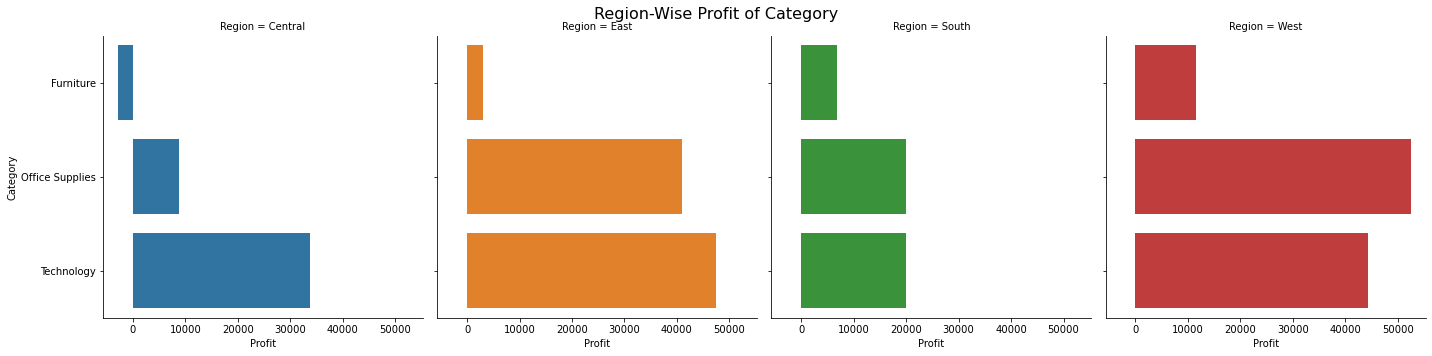

In [29]:
temp_data = df.groupby(['Region', 'Category']).sum().reset_index()


g = sns.FacetGrid(temp_data, col="Region", hue='Region', col_wrap=4, size=5)
g.map(sns.barplot, "Profit", "Category")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Region-Wise Profit of Category', fontsize=16)

> __Profit comparisons between regions and categories__

- __Central: The profit of the Furniture Category needs to improve on an immediate basis because this category is in loss (Negative Profit) and also needs to improve the profit of the Office Supplies Category.__
- __East: The profit of the Furniture Category needs to improve otherwise, the other two categories are Performing well.__
- __South: This Region needs more work to improve the Profit in all three Categories.__
- __West: West Region is Performing well  as the rest of other Regions.__

Text(0.5, 0.98, 'Region-Wise Profit of Sub-Category')

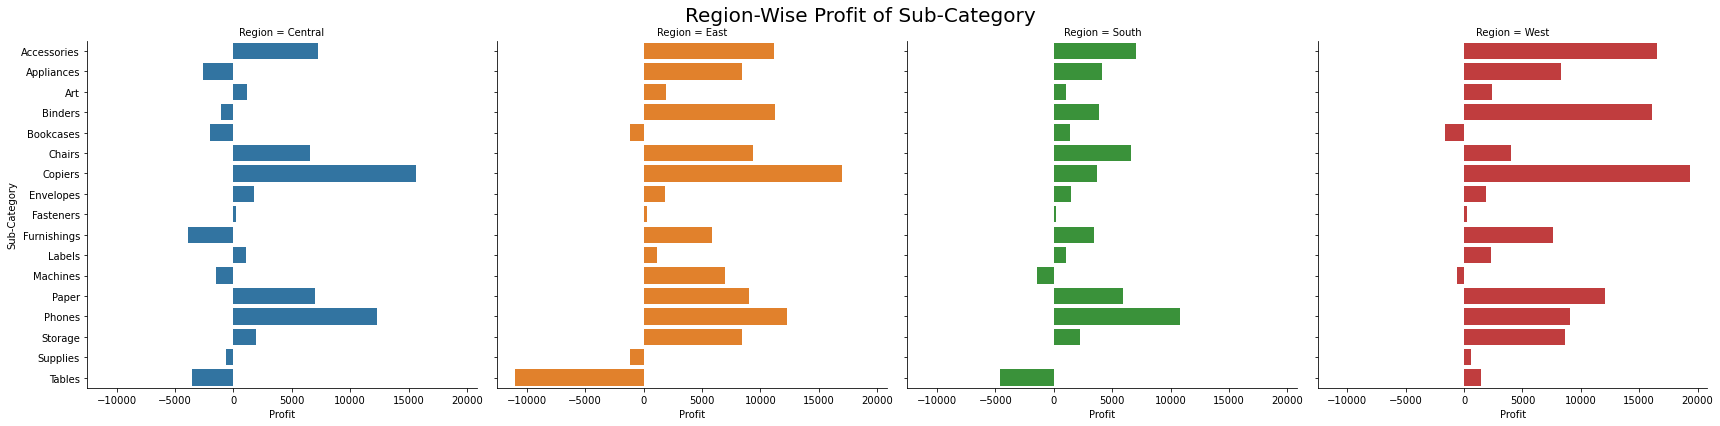

In [30]:
temp_data = df.groupby(['Region', 'Sub-Category']).sum().reset_index()


g = sns.FacetGrid(temp_data, col="Region", hue='Region', col_wrap=4, size=6)
g.map(sns.barplot, "Profit", "Sub-Category")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Region-Wise Profit of Sub-Category', fontsize=20)

> __Region-wise profit comparison of subcategories__

- __Central: Those sub-categories that need to work on an immediate basis are Appliances, Binders, Bookcases, Furnishing, Machines, Supplies, and Tables since they are experiencing losses (negative profits) while Copier and Phones have the best performance.__

- __East: Those sub-categories that need to work on an immediate basis are Bookcases, Supplies, and Tables  since they are experiencing losses (negative profits)and also need to improve the Profit of the Fasteners Sub-Category  while Accessories, Binders, Copier and Phones have the best performance.__

- __South:  Those sub-categories that need to work on an immediate basis are Machines and Tables since they are experiencing losses (negative profits) and also need to improve the Profit of the Fasteners Sub-Category and also needs to focus Supplies Sub-Category shows no Profit while Accessories and Phones have the best performance.__

- __West: Those sub-categories that need to work on an immediate basis are Machines and Bookcases since they are experiencing losses (negative profits) and also need to improve the Profit of the Fasteners and Supplies Sub-Categories  while Accessories, Binders, Copier and Paper have the best performance.__

Text(0.5, 0.98, 'State-Wise Profit of Category')

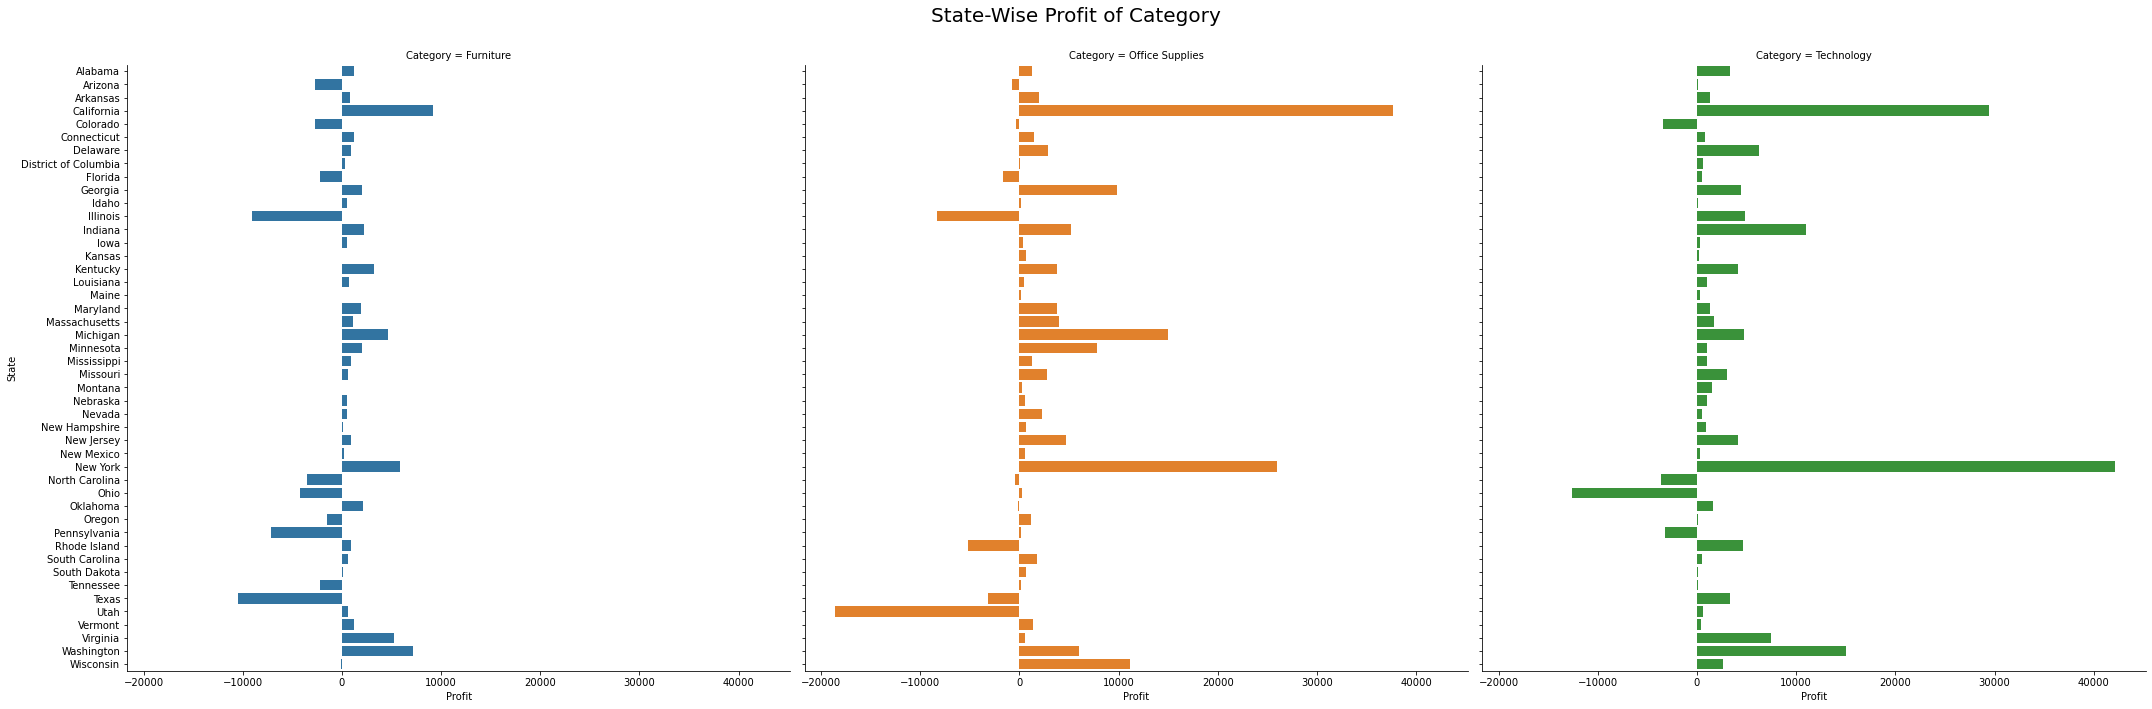

In [31]:
temp_data = df.groupby(['State', 'Category']).sum().reset_index()


g = sns.FacetGrid(temp_data, col="Category", hue='Category', col_wrap=3, size=10)
g.map(sns.barplot, "Profit", "State")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('State-Wise Profit of Category', fontsize=20)

> __State-wise profit comparison of categories__

- __Furniture Category : Those states that need to work on an immediate basis are Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Oregon, Pennsylvania, Tennessee, and Texas since they are experiencing losses (negative profits), while California, New York, Washington, and Wisconsin have the best performance.__


- __Office Supplies Category : Those states that need to work on an immediate basis are Arizona, Colorado, Florida, Illinois, North Carolina, Oklahoma, Rhode Island, Texas, and Utah since they are experiencing losses (negative profits), while California, Georgia, Michigan, Minnesota New York, Washington, and Wisconsin have the best performance.__



- __Technology Category : Those states that need to work on an immediate basis are Colorado, North Carolina, Ohio, and Pennsylvania since they are experiencing losses (negative profits), while California, Indiana, New York, and  Washington, have the best performance.__


### Outlier Detection

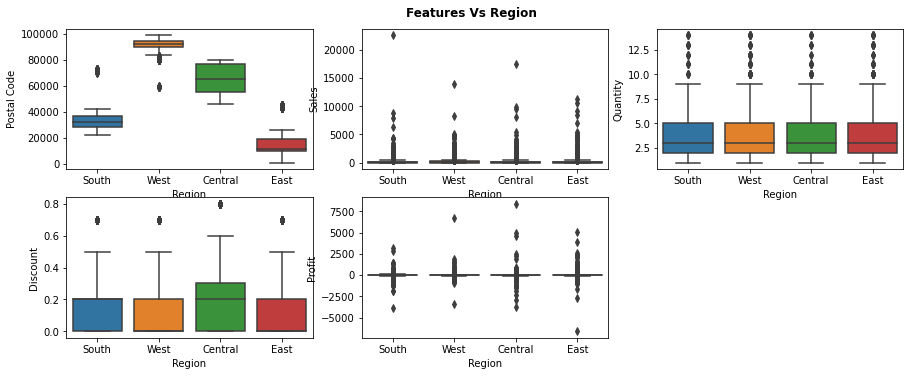

In [32]:
plt.figure(figsize=(15,15))
plt.suptitle("Features Vs Region",fontweight='bold',y=0.9)
for i in range(0, len(num_col)):
 ax = plt.subplot(5, 3, i+1)
 sns.boxplot(data = df, x="Region", y = df[num_col[i]])

> __All five Numerical Columns contains Outliers__

### Deal the Outliers by IQR Method

In [51]:
# Remove the Outliers from all the numerical columns except Profit
for colname, colvals in df.iteritems():
    if df[colname].dtype!=object and colname != "Profit":
        Q1 = df[colname].quantile(q=0.25)
        Q3 = df[colname].quantile(q=0.75)
        IQR = Q3 - Q1
        Lower = Q1 - (1.5*IQR)
        Upper = Q3 + (1.5*IQR)
        df.loc[(df[colname]<Lower) | (df[colname]>Upper), colname] = df[colname].median()
    else:
        continue
        

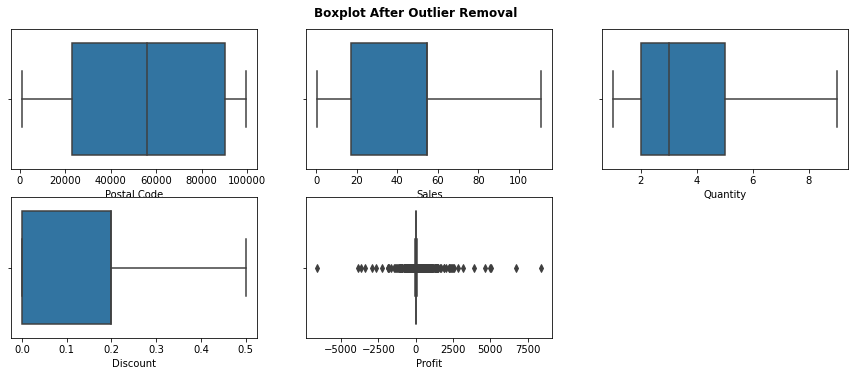

In [52]:
plt.figure(figsize=(15,15))
plt.suptitle("Boxplot After Outlier Removal",fontweight='bold',y=0.9)
for i in range(0, len(num_col)):
    ax = plt.subplot(5, 3, i+1)
    sns.boxplot(data = df, x = df[num_col[i]])

### Considering these columns did not provide sufficient information for analysis, I dropped them.

In [35]:
df_R = df.drop(["Postal Code","City","Country"],axis=1)

In [36]:
df_R.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,54.816,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,54.816,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.20,2.5164


### Inclusion of New Column for Further Analysis  

#### 1. Net Sales
#### 2. Cost


In [37]:
def net_sales(df_R):
    net_sales = df_R["Sales"] * (1-df_R["Discount"])
    return net_sales
df_R["Net_Sales"] = df_R.apply(net_sales,axis=1)

In [38]:
def cost(df_R):
    cost = df_R["Net_Sales"] - (df_R["Profit"])
    return cost
df_R["Cost"] = df_R.apply(cost,axis=1)

In [39]:
df_R.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Net_Sales,Cost
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2,0.00,41.9136,261.9600,220.0464
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,54.816,3,0.00,219.5820,54.8160,-164.7660
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2,0.00,6.8714,14.6200,7.7486
3,Standard Class,Consumer,Florida,South,Furniture,Tables,54.816,5,0.45,-383.0310,30.1488,413.1798
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.20,2.5164,17.8944,15.3780


### Comparison of Cost Incurred on different Ship Mode

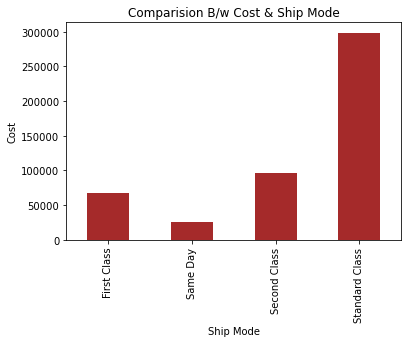

In [40]:
df_R.groupby("Ship Mode")["Cost"].sum().plot.bar(color="Brown")
plt.ylabel("Cost")
plt.title("Comparision B/w Cost & Ship Mode")
plt.show()

> __Result: Standard Class is Cost higher than other Shipping Mode.__

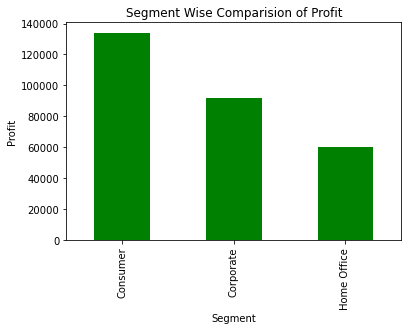

In [41]:
df_R.groupby("Segment")["Profit"].sum().plot.bar(color="Green")
plt.ylabel("Profit")
plt.title("Segment Wise Comparision of Profit")
plt.show()

> __Result: Consumer Segment Profit is higher than Other Segment.__

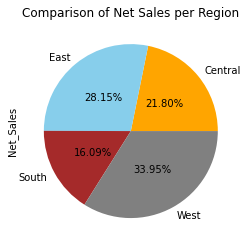

In [42]:
df_R.groupby("Region")["Net_Sales"].sum().plot(kind="pie",autopct="%.2f%%", pctdistance=0.5, colors = ( "orange", "skyblue", "brown", "grey"))

plt.title("Comparison of Net Sales per Region")
plt.show()

> __Result: West Region contributed 34% of Net Sales from the Total.__

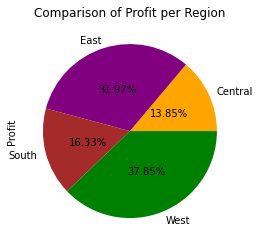

In [43]:
df_R.groupby("Region")["Profit"].sum().plot(kind="pie",autopct="%.2f%%", pctdistance=0.5, colors = ( "orange", "purple", "brown", "green"))

plt.title("Comparison of Profit per Region")
plt.show()

> __Result: West Region contributed 37.85% of Profit from the Total.__

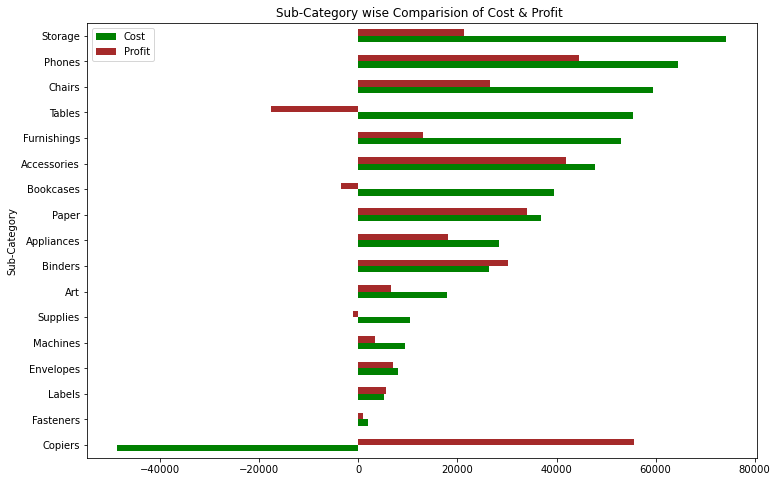

In [44]:
df_R.groupby("Sub-Category")[["Cost","Profit"]].sum().sort_values(by="Cost",ascending=True).plot(kind="barh",figsize=(12,8),color=["Green","Brown"])
plt.title("Sub-Category wise Comparision of Cost & Profit ")
plt.show()

> __Result: Copiers, Phones, and Accessories Sub-Categories are Profitable whereas Supplies, Bookcases Tables are in loss.__

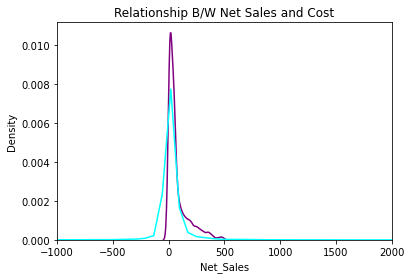

In [45]:
sns.kdeplot(data=df_R["Net_Sales"],color="Purple")
sns.kdeplot(data=df_R["Profit"],color="Cyan")
plt.xlim(-1000,2000)
plt.title("Relationship B/W Net Sales and Cost")
plt.show()

> __Result: Profit is greater in Comparision to Net Sales.__

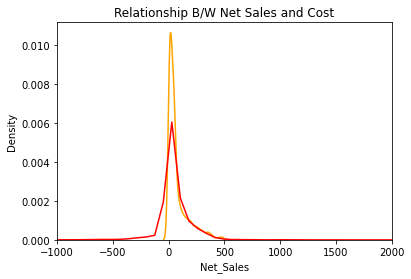

In [46]:
sns.kdeplot(data=df_R["Net_Sales"],color="Orange")
sns.kdeplot(data=df_R["Cost"],color="Red")
plt.xlim(-1000,2000)
plt.title("Relationship B/W Net Sales and Cost")
plt.show()

> __Result: Net Sales is associated in alignment With Cost.__

# Summary
> __Need more focus on Central & South Regions.\
> Eliminate those Sub-Categories which are causing loss.\
> Need to improve the Profit of the Furniture Category.\
> Need to Eliminate those Ship Modes that incurred High Costs than others.\
> Needs to be focused on those States whose are good in Sales but still not Profitable.\
> Finally, resources must be optimized, wastage is reduced so the reduction in overall cost maximizes sales and profit.__ 

# ___Thank you___